#### 1) Histogram of WBGT distribution for current and for future 10yr
- 1.1) Yuma domain (80km x 80 km) average
- 1.2) Land points in the CONUS404 domain.
 
#### 2) Diurnal change of annual average number of black flag hours  

In [1]:
import os.path
import numpy as np
import xarray as xr
import datetime
import seaborn as sns

import matplotlib.pyplot as plt 
import pandas as pd
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
def plot_cartopy_2d(lat_2d, lon_2d, data_2d, title_s, vmin, vmax, nlevel, cmap):
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

    levels = np.linspace(vmin, vmax, nlevel) 
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    mm = plt.contourf(lon_2d, lat_2d, data_2d, 
                      cmap = cmap,
                      vmin = vmin, vmax = vmax, levels = levels,
                      transform=ccrs.PlateCarree())
    ax.coastlines()
 
    ax.coastlines(lw=1.5, resolution='110m')
    ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
    plt.colorbar(mm, orientation='horizontal', pad=0.03)    
    
    gl = ax.gridlines(draw_labels=True)   
    gl.xlines = gl.ylines = False

    plt.title(title_s, fontweight="bold",fontsize=14)
    plt.show()

In [3]:
dir_if = '/glade/campaign/mmm/c3we/prein/CONUS404/data/MonthlyData_PGW/GWBT/'
dir_ic = '/glade/campaign/mmm/c3we/ESTCP/CONUS404/GWBT/'
dir_o = '/glade/campaign/mmm/c3we/mingge/DOD/'

year_s = 1980
year_e = 1989
n_year = year_e - year_s + 1

v_min = 200 
v_max = 350

bins = np.arange(v_min, v_max, 10)
n_bin = len(bins) - 1
print('bins', bins)

bins [200 210 220 230 240 250 260 270 280 290 300 310 320 330 340]


#### 1 histogram of WBGT for current and for future 10yr
- 1.1) Yuma domain (80km x 80km )

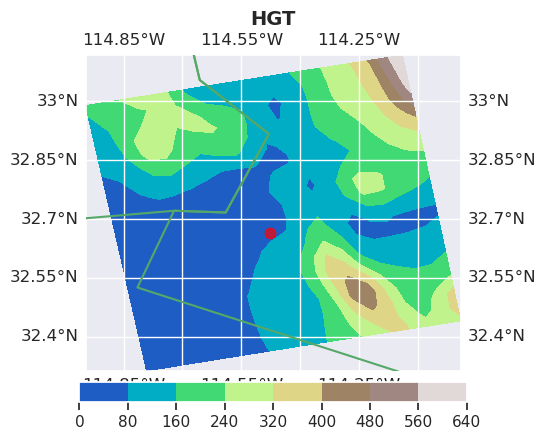

In [25]:
# Yuma
lon_pt = -114.47603157249804
lat_pt = 32.665135

# Yuma domain
i_s = 358
i_e = 378
j_s = 291
j_e = 311

n_pt_sm = (i_e - i_s)*(j_e-j_s)

flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
with xr.open_dataset(flnm) as ds:
    hgt = ds.HGT[0]
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
mm = plt.contourf(ds.XLONG[0, i_s:i_e, j_s:j_e], ds.XLAT[0, i_s:i_e, j_s:j_e], hgt[i_s:i_e, j_s:j_e],
                  cmap = 'terrain',
                  transform=ccrs.PlateCarree())
ax.plot(lon_pt, lat_pt, marker='.', color='red', markersize=15, alpha=0.7, transform=ccrs.Geodetic())
 
ax.coastlines(lw=1.5, resolution='110m')
ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
plt.colorbar(mm, orientation='horizontal', pad=0.03)    

gl = ax.gridlines(draw_labels=True)   
gl.xlines = gl.ylines = True
    
plt.title('HGT', fontweight="bold",fontsize=14)
plt.show()

In [5]:
# compute Yuma box WBGT frequeny of each bin 

flnm_o = dir_o + 'frequency_current_smallDM.txt'
flnm_o = dir_o + 'frequency_future_smallDM.txt'

if os.path.exists(flnm_o):
    print(flnm_o, 'exist')
else:
    is_first = True
    for year in range(year_s, year_e + 1):
        for month in range(1, 13):
            yyyymm = year*100 + month
            if flnm_o == dir_o + 'frequency_current_smallDM.txt':
                flnm_i = dir_ic + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
            else:
                flnm_i = dir_if + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
                
            with xr.open_dataset(flnm_i) as ds:
                print(flnm_i)
                if flnm_o == dir_o + 'frequency_current_smallDM.txt':
                    wbgt = ds.GWBT[:,i_s:i_e, j_s:j_e]
                else:
                    wbgt = ds.__xarray_dataarray_variable__[:,i_s:i_e, j_s:j_e]
    
                # convert to a contiguous flattened 1-D array.
                wbgt_1d = np.ravel(wbgt)
            
                if is_first == True:
                    # Compute frequency within the bins
                    count_1d = np.histogram(wbgt_1d, bins=bins)[0]
                    is_first = False
                else:
                    count_1d = count_1d + np.histogram(wbgt_1d, bins=bins)[0]

    print(flnm_o)
    np.savetxt(flnm_o, count_1d)

/glade/campaign/mmm/c3we/mingge/DOD/frequency_future_smallDM.txt exist


 - 1.2 CONUS404 land points

total land points of CONUS404: 818202


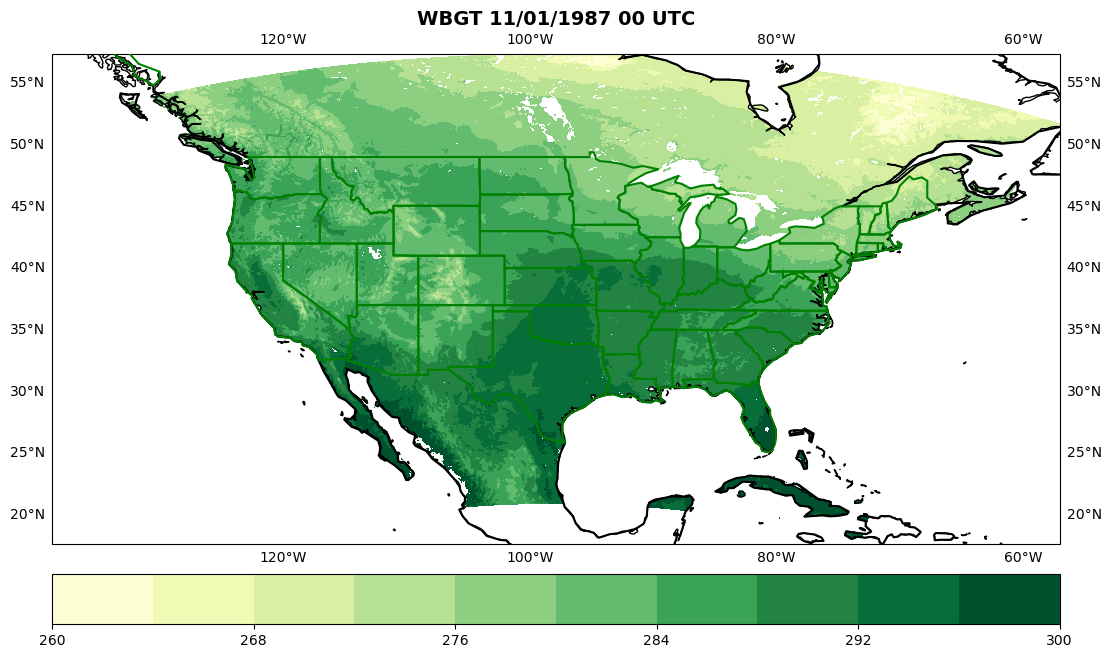

CPU times: user 3.6 s, sys: 165 ms, total: 3.77 s
Wall time: 4.18 s


In [6]:
%%time

# read mask
flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
with xr.open_dataset(flnm) as ds:
    # If drop=True, drop squeezed coordinates
    mask_land = (ds.LANDMASK >= 1).squeeze(['Time'], drop=True)
    
    # rename dimensions to WBGT
    mask_land = mask_land.rename({'south_north': 'y', 'west_east': 'x'})
        
    # count land points
    n_pt_lg = int(mask_land.sum())
    print('total land points of CONUS404:', n_pt_lg)
    
flnm = dir_if + 'GWBT_198711_CONUS404.nc'
with xr.open_dataset(flnm) as ds:
    wbgt =ds.__xarray_dataarray_variable__[0] 
    
    # land mask 
    LandOnly = wbgt.where(mask_land) 
    
    plot_cartopy_2d (ds.lat, ds.lon, LandOnly, 'WBGT 11/01/1987 00 UTC', 260, 300, 11, 'YlGn')    

In [7]:
# compute Land points of CONUS404 domain WBGT frequeny of each bin

flnm_o = dir_o + 'frequency_current.txt'
flnm_o = dir_o + 'frequency_future.txt'

if os.path.exists(flnm_o):
    print(flnm_o, 'exist')
else:
    is_first = True
    for year in range(year_s, year_e + 1):
        for month in range(1, 13):
            yyyymm = year*100 + month
            if flnm_o == dir_o + 'frequency_current.txt':
                flnm_i = dir_ic + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
            else:
                flnm_i = dir_if + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
                
            with xr.open_dataset(flnm_i) as ds:
                print(flnm_i)
                if flnm_o == dir_o + 'frequency_current.txt':
                    wbgt = ds.GWBT 
                else:
                    wbgt = ds['__xarray_dataarray_variable__']
                    
                # land mask 
                wbgt_l = wbgt.where(mask_land).values
    
                # convert to a contiguous flattened 1-D array.
                wbgt_1d = np.ravel(wbgt_l)
            
                # get rid of nan
                wbgt_1d = wbgt_1d[~np.isnan(wbgt_1d)]
            
                if is_first == True:
                    # Compute frequency within the bins
                    count_1d = np.histogram(wbgt_1d, bins=bins)[0]
                    is_first = False
                else:
                    count_1d = count_1d + np.histogram(wbgt_1d, bins=bins)[0]

    print(flnm_o)
    np.savetxt(flnm_o, count_1d)

/glade/campaign/mmm/c3we/mingge/DOD/frequency_future.txt exist


- 1.3) Plotting

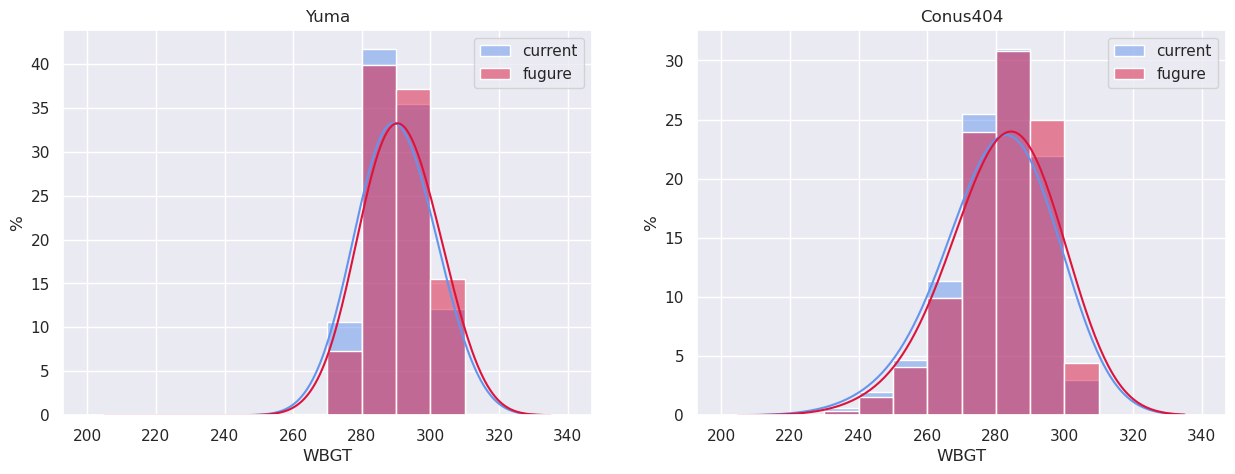

In [8]:
#%%time

sns.set()

count_1d = np.empty((n_bin))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

flnm_1d = ['frequency_current_smallDM.txt','frequency_future_smallDM.txt']
color_1d = ['cornflowerblue', 'crimson']
label_1d = ['current', 'fugure']

n_total_sm = n_pt_sm*24*(n_year*365 + 2) 
for nn in range(2):
    # Reading a file line by line into elements of an array
    with open(dir_o + flnm_1d[nn]) as my_file:
        # get rid of '\n' at the end of a line
        ct = 0
        for line in my_file:
            count_1d[ct] = float(line.strip())
            ct = ct + 1
            
        sns.histplot(x=(bins[:-1]+bins[1:])/2, weights=count_1d/n_total_sm*100, 
                     bins=n_bin, binrange=(v_min, bins[-1]), kde=True, 
                     color=color_1d[nn], alpha=0.5, label=label_1d[nn], ax=axs[0])
axs[0].set_title('Yuma')
axs[0].legend()
axs[0].set(xlabel='WBGT', ylabel='%')

flnm_1d = ['frequency_current.txt','frequency_future.txt']
 
n_total_lg = n_pt_lg*24*(n_year*365 + 2)

for nn in range(2):
    with open(flnm_1d[nn]) as my_file:
        # get rid of '\n' at the end of a line
        ct = 0
        for line in my_file:
            count_1d[ct]= float(line.strip())
            ct = ct + 1
            
        sns.histplot(x=(bins[:-1]+bins[1:])/2, weights=count_1d/n_total_lg*100, 
                     bins=n_bin, binrange=(v_min, bins[-1]), kde=True, 
                     color=color_1d[nn], alpha=0.5, label=label_1d[nn], ax=axs[1])
axs[1].set_title('Conus404')
axs[1].legend()
axs[1].set(xlabel='WBGT', ylabel='%');

 - compare histogram and  seaborn.histplot frequency plot 
 ( I need to plot histogram distribution from frequency)

CPU times: user 149 ms, sys: 9.78 ms, total: 159 ms
Wall time: 262 ms


<AxesSubplot:ylabel='Count'>

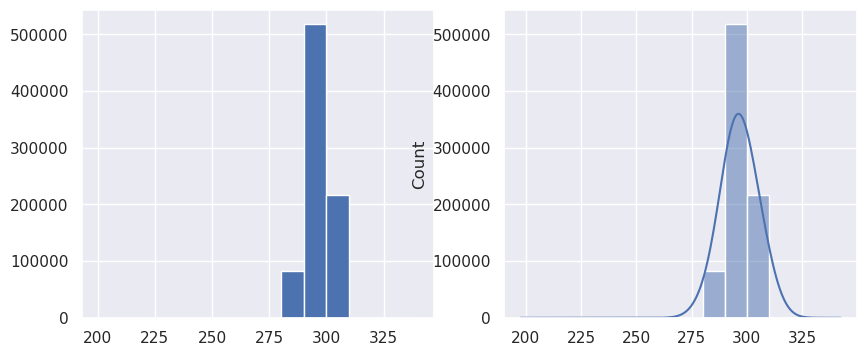

In [9]:
%%time

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
flnm = dir_if + 'GWBT_198908_CONUS404.nc'
 
with xr.open_dataset(flnm) as ds:
    wbgt =ds.__xarray_dataarray_variable__[0]
    
    # land mask 
    wbgt_l  = wbgt.where(mask_land).values
    
    #a contiguous flattened 1-D array.
    wbgt_1d = np.ravel(wbgt_l)
    wbgt_1d = wbgt_1d[~np.isnan(wbgt_1d)]
    
    axs[0].hist(wbgt_1d, bins=bins)
    
# Plot histogram and distribution from frequency
# 
# Compute frequency and bins
count_1d = np.histogram(wbgt_1d, bins=bins)[0]

sns.histplot(x=(bins[:-1] + bins[1:])/2, weights=count_1d, bins=len(bins)-1, binrange=(v_min, bins[-1]),
                 kde=True, kde_kws={'cut': .3}, alpha=0.5, ax = axs[1]); 

#### 2) diurnal plot of annual average number of black flag hours  
For 9 grid pts around Yuma. 

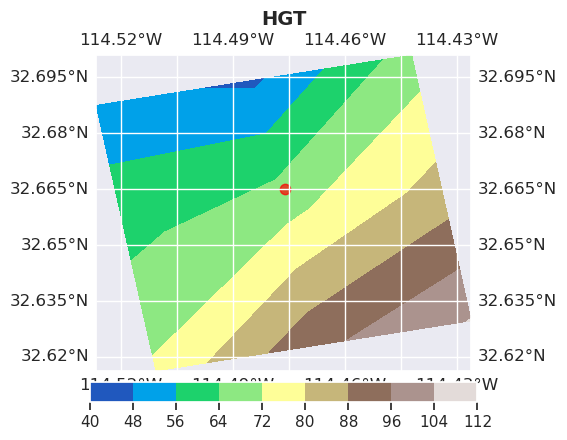

In [10]:
# Yuma
lon_pt = -114.47603157249804
lat_pt = 32.665135

# Yuma domain
i_s9 = 365
i_e9 = 368
j_s9 = 299
j_e9 = 302

flnm = '/glade/campaign/mmm/c3we/prein/CONUS404/data/restart_file/wrfrst_d01_1990-01-01_00:00:00'
with xr.open_dataset(flnm) as ds:
    hgt = ds.HGT[0]
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection= ccrs.PlateCarree())

cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
mm = plt.contourf(ds.XLONG[0, i_s9:i_e9, j_s9:j_e9], ds.XLAT[0, i_s9:i_e9, j_s9:j_e9], hgt[i_s9:i_e9, j_s9:j_e9],
                  cmap = 'terrain',
                  transform=ccrs.PlateCarree())
ax.plot(lon_pt, lat_pt, marker='.', color='red', markersize=15, alpha=0.7, transform=ccrs.Geodetic())
 
ax.coastlines(lw=1.5, resolution='110m')
ax.add_feature(cfeature.STATES.with_scale('110m'), zorder=3, linewidth=1.5, edgecolor='g')
plt.colorbar(mm, orientation='horizontal', pad=0.03)    

gl = ax.gridlines(draw_labels=True)   
gl.xlines = gl.ylines = True
    
plt.title('HGT', fontweight="bold",fontsize=14)
plt.show()

In [12]:
tbf = 305.372  # 90F -> K
n_tbf_2d = np.empty((2,24))

# compute Yuma box WBGT frequeny of > tbf

flnm_o = dir_o + 'ntbf_current_9pt.txt'
#flnm_o = dir_o + 'ntbf_future_9pt.txt'

if os.path.exists(flnm_o):
    print(flnm_o, 'exist')
else:
    is_first = True
    for year in range(year_s, year_e + 1):
        for month in range(1, 13):
            yyyymm = year*100 + month
            if flnm_o == dir_o + 'ntbf_current_9pt.txt':
                flnm_i = dir_ic + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
            else:
                flnm_i = dir_if + 'GWBT_' +  str(yyyymm) + '_CONUS404.nc'
            with xr.open_dataset(flnm_i) as ds:
                print(flnm_i)
                if flnm_o == dir_o + 'ntbf_current_9pt.txt':
                    wbgt = ds.GWBT[:,i_s9:i_e9, j_s9:j_e9].mean(dim=['x', 'y']).values
                else:
                    wbgt = ds.__xarray_dataarray_variable__[:,i_s9:i_e9, j_s9:j_e9].mean(dim=['x', 'y']).values
    
                wbgt_2d = wbgt.reshape((int(wbgt.shape[0]/24), 24))
                wbgt_2d = wbgt_2d - tbf
                 
                if is_first == True:
                    n_tbf_1d = np.sum(wbgt_2d > 0, axis = 0) 
                    is_first = False
                else:
                    n_tbf_1d = n_tbf_1d + np.sum(wbgt_2d > 0, axis = 0) 
    print(n_tbf_1d)
    print(flnm_o)
    np.savetxt(flnm_o, n_tbf_1d)

/glade/campaign/mmm/c3we/mingge/DOD/ntbf_current_9pt.txt exist


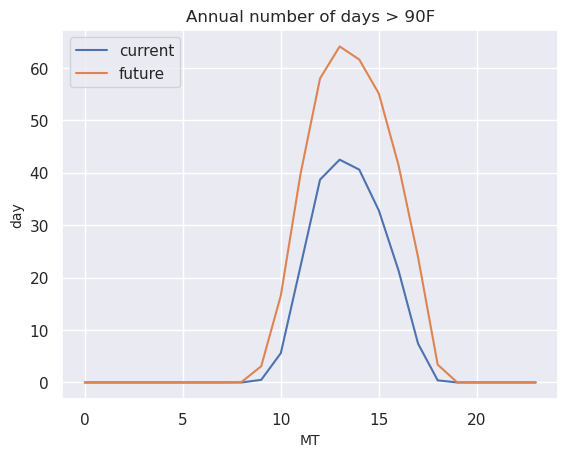

In [21]:
# use LST UTC - 7
flnm_c = dir_o + 'ntbf_current_9pt.txt'
flnm_f = dir_o + 'ntbf_future_9pt.txt'
flnm_1d = [flnm_c, flnm_f]
count_2d = np.empty((2, 24))

for nn in range(2):
    # Reading a file line by line into elements of an array
    with open(flnm_1d[nn]) as my_file:
        # get rid of '\n' at the end of a line
        ct = 0
        for line in my_file:
            count_2d[nn,ct] = float(line.strip())
            ct = ct + 1
            
    # shift each element to the left -/right +
    # make it MT for Yuma
    data_new = np.roll(count_2d[nn]*0.1, -7)

    plt.plot(data_new)

plt.title("Annual number of days > 90F")
plt.xlabel('MT', fontsize=10)  
plt.ylabel('day', fontsize=10) 
plt.legend(["current", "future"], loc ="upper left");